# First Project 27 September 2022 Nealson Setiawan

## Question: What Factors affects box office? Can we use it to predict future box offices?

##### Pre-processing

In [402]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import re

##### Functions

In [403]:
def getIndexCol(colName, df):
    return df.columns.get_loc(colName)

    

##### Reading CSV File

In [404]:

IMDBdf = pd.read_csv('../Datasets/IMDB_movie_reviews_details.csv')

IMDBdf.head(5)
#Purely Raw
#Gross is the dependent variable

,Unnamed: 0,name,year,runtime,genre,rating,metascore,timeline,votes,gross
0,0,The Shawshank Redemption,1994,142,Drama,9.3,80.0,Two imprisoned men bond over a number of years...,"2,394,059",$28.34M
1,1,The Godfather,1972,175,"Crime, Drama",9.2,100.0,An organized crime dynasty's aging patriarch t...,"1,658,439",$134.97M
2,2,Soorarai Pottru,2020,153,Drama,9.1,NaN,"Nedumaaran Rajangam ""Maara"" sets out to make t...","78,266",NaN
3,3,The Dark Knight,2008,152,"Action, Crime, Drama",9.0,84.0,When the menace known as the Joker wreaks havo...,"2,355,907",$534.86M
4,4,The Godfather: Part II,1974,202,"Crime, Drama",9.0,90.0,The early life and career of Vito Corleone in ...,"1,152,912",$57.30M


In [405]:
IMDBdf.shape

(1000, 10)

In [406]:
IMDBdf.dtypes

Unnamed: 0      int64
name           object
year           object
runtime         int64
genre          object
rating        float64
metascore     float64
timeline       object
votes          object
gross          object
dtype: object

In [407]:
IMDBdf.isnull().sum()

Unnamed: 0      0
name            0
year            0
runtime         0
genre           0
rating          0
metascore     159
timeline        0
votes           0
gross         171
dtype: int64

#### Cleaning raw data

Checklist:
<br>
1. Are values prone to error? 
<br>
2. Do we have the same unit for the data? 
<br>
3. Is there consistency in the meaning of data?
<br>
4. Are there missing values in your data and what is the reason and what you can do about it?
<br>
5. Is the same value recorded in the same way everywhere?
<br>
6. Are there any duplicates?
<br>
7. Is your data unbiased?
<br>
8. Removed all sources of noise from your data?
<br>
9. Identified and remove sources of data leakage?
<br>
10. Are there any obvious outliers?
<br>

I got from https://www.kaggle.com/getting-started/187884.


### Gross (Response Variable)

##### Turning Gross into countable integers

In [408]:
IMDBdf.columns.get_loc('gross') #Finding index of 'gross'

9

In [409]:
for i in range(0,len(IMDBdf['gross'])):
        if isinstance(IMDBdf.iloc[i,getIndexCol('gross',IMDBdf)],str):
            IMDBdf.iloc[i,getIndexCol('gross',IMDBdf)] = IMDBdf.iloc[i,getIndexCol('gross',IMDBdf)].replace('$','') #Removing all $
            IMDBdf.iloc[i,getIndexCol('gross',IMDBdf)] = IMDBdf.iloc[i,getIndexCol('gross',IMDBdf)].replace('M','') #Removing all M
        #print('success'+str(i))





IMDBdf['gross'] = IMDBdf['gross'].fillna(0).astype(float) #Casting to float

In [438]:
iGross = IMDBdf['gross']

### Votes

##### Removing all commas from votes column and casting to integers

In [410]:
for i in range(0,len(IMDBdf['votes'])):
    IMDBdf.iloc[i,getIndexCol('votes',IMDBdf)] = IMDBdf.iloc[i,getIndexCol('votes',IMDBdf)].replace(',','') #Removing all commas from votes and casting to integers
    #print('success'+str(i))

IMDBdf['votes'] = IMDBdf['votes'].fillna(0).astype(int)

##### Plotting Gross vs Votes

In [411]:
plt.scatter

<function matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, *, edgecolors=None, plotnonfinite=False, data=None, **kwargs)>

### Timeline

##### Dropping Timeline because I am not versed with NLP yet!

In [412]:
IMDBdf = IMDBdf.drop('timeline', axis=1)

### Metascore

##### Casting to Int

In [413]:
IMDBdf['metascore'] = IMDBdf['metascore'].fillna(0).astype(float)

### Rating

In [414]:
IMDBdf['rating'] = IMDBdf['rating'].fillna(0).astype(float)

### Genre

In [415]:
IMDBdf['genre_first'] = IMDBdf['genre']

##### Extracting only first string from Genre column

In [416]:
for i in range(0,len(IMDBdf['genre'])): #Getting only first string because some genres have two genres
    if ',' in IMDBdf.iloc[i,4]:
        IMDBdf.iloc[i,getIndexCol('genre_first',IMDBdf)] = IMDBdf.iloc[i,getIndexCol('genre',IMDBdf)].split(',')[0]
    else:
        IMDBdf.iloc[i,getIndexCol('genre_first',IMDBdf)] = IMDBdf.iloc[i,getIndexCol('genre',IMDBdf)]

IMDBdf = IMDBdf.drop('genre',axis=1) #Dropping Genre column

In [435]:
IMDBdf.loc[:,'genre_first'].unique()

array(['Drama', 'Crime', 'Action', 'Biography', 'Western', 'Comedy',
       'Adventure', 'Animation', 'Horror', 'Mystery', 'Film-Noir',
       'Fantasy', 'Family', 'Thriller'], dtype=object)

In [433]:
pd.Series(IMDBdf.loc[:,'genre_first'].unique()).count()

14

In [445]:
IMDBdf['genre_first'].value_counts()

Drama        291
Action       171
Comedy       154
Crime        111
Biography     85
Animation     84
Adventure     69
Horror        12
Mystery       11
Western        4
Fantasy        3
Film-Noir      2
Family         2
Thriller       1
Name: genre_first, dtype: int64

<AxesSubplot:xlabel='genre_first'>

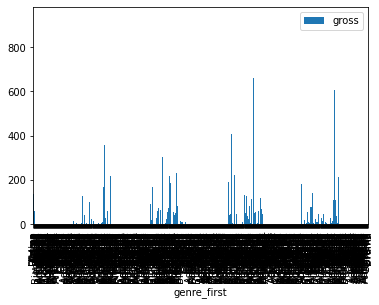

In [451]:
IMDBdf.plot(kind='bar',x='genre_first',y='gross') #Fix


### Runtime

In [418]:
IMDBdf['runtime'] = IMDBdf['runtime'].fillna(0).astype(int)

### Year

##### Extract only numbers from year and turn to Numeric

In [419]:
yearPattern = '(\d+)'
IMDBdf['yearNumber'] = IMDBdf['year'].astype('str').str.extractall(yearPattern).unstack().fillna('').sum(axis=1).astype(int)

#From https://www.pauldesalvo.com/how-to-extract-all-numbers-from-a-string-column-in-python-pandas/

In [420]:
IMDBdf = IMDBdf.drop('year',axis=1)

### Name

##### Dropping Names

In [421]:
IMDBdf = IMDBdf.drop('name',axis =1)

### Removing Dupes

In [422]:
IMDBdf['dupe'] = IMDBdf.duplicated()

In [423]:
IMDBdf.loc[IMDBdf['dupe'] == True] #None!

,Unnamed: 0,runtime,rating,metascore,votes,gross,genre_first,yearNumber,dupe


#### Plotting Null

In [424]:
dfNull = IMDBdf.where(IMDBdf.isnull())




## Cleaned Data

In [425]:
IMDBdf.head(100)

,Unnamed: 0,runtime,rating,metascore,votes,gross,genre_first,yearNumber,dupe
0,0,142,9.3,80.0,2394059,28.34,Drama,1994,False
1,1,175,9.2,100.0,1658439,134.97,Crime,1972,False
2,2,153,9.1,0.0,78266,0.00,Drama,2020,False
3,3,152,9.0,84.0,2355907,534.86,Action,2008,False
4,4,202,9.0,90.0,1152912,57.30,Crime,1974,False
...,...,...,...,...,...,...,...,...,...
95,95,108,8.3,89.0,927213,34.40,Drama,2004,False
96,96,122,8.3,69.0,713537,33.23,Comedy,2001,False
97,97,102,8.3,55.0,794366,30.33,Comedy,2000,False
98,98,102,8.3,68.0,779993,3.64,Drama,2000,False


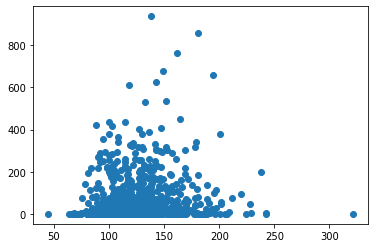

In [426]:
plt.scatter(x=IMDBdf['runtime'], y=IMDBdf['gross'])